AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')  # Adjust the path as needed

# Display the first 10 rows
print("First 10 rows:")
print(df.head(10))

# Display the last 20 rows
print("\nLast 20 rows:")
print(df.tail(20))

# Display dataset's information
print("\nDataset Information:")
df_info = df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


First 10 rows:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Age         177
Cabin       687
Embarked      2
dtype: int64


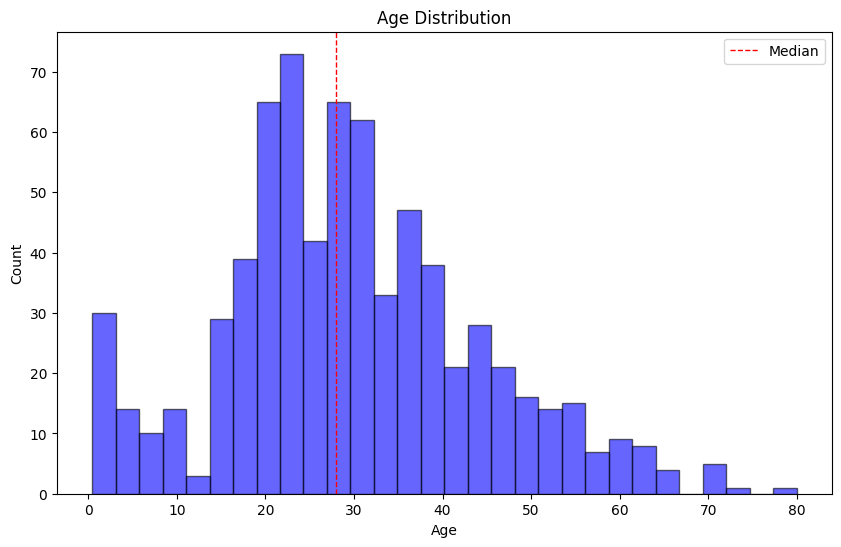

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Check for missing values
missing_data = data.isna().sum()
print(missing_data[missing_data > 0])

# Visualize the 'Age' distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'].dropna(), bins=30, alpha=0.6, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(data['Age'].median(), color='red', linestyle='dashed', linewidth=1)
plt.legend({'Median': data['Age'].median()})
plt.show()

# Handle missing 'Age' values
age_median = data['Age'].median()
data.loc[data['Age'].isna(), 'Age'] = age_median

# Fill missing 'Cabin' values with 'Unknown'
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Handle missing 'Embarked' values with the mode
most_common_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_common_embarked, inplace=True)

# Validate and clean 'Survived' column
if not data['Survived'].isin([0, 1]).all():
    data = data[data['Survived'].isin([0, 1])]

# Convert 'Fare' to numeric and handle non-numeric values
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Output dataset information
print(data.info())

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

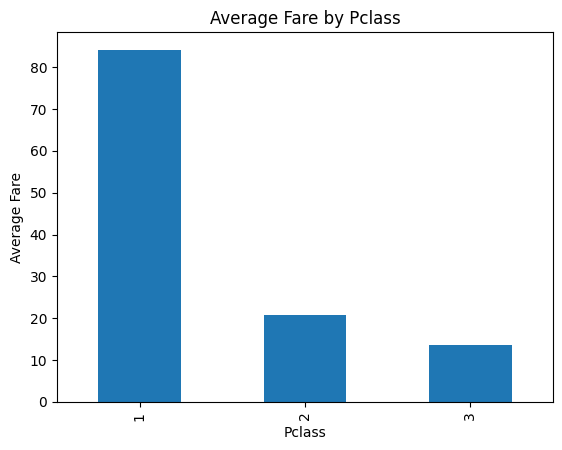

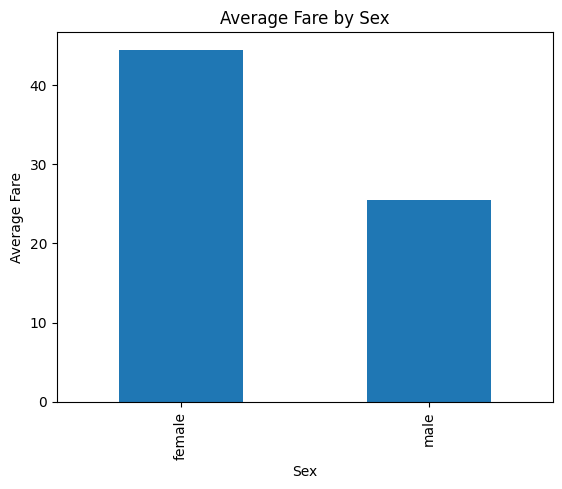

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 

# 1. Average fare grouped by Pclass
avg_fare_pclass = df.groupby('Pclass')['Fare'].mean()
avg_fare_pclass.plot(kind='bar', title='Average Fare by Pclass', xlabel='Pclass', ylabel='Average Fare')
plt.show()

# 2. Average fare grouped by Sex
avg_fare_sex = df.groupby('Sex')['Fare'].mean()
avg_fare_sex.plot(kind='bar', title='Average Fare by Sex', xlabel='Sex', ylabel='Average Fare')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

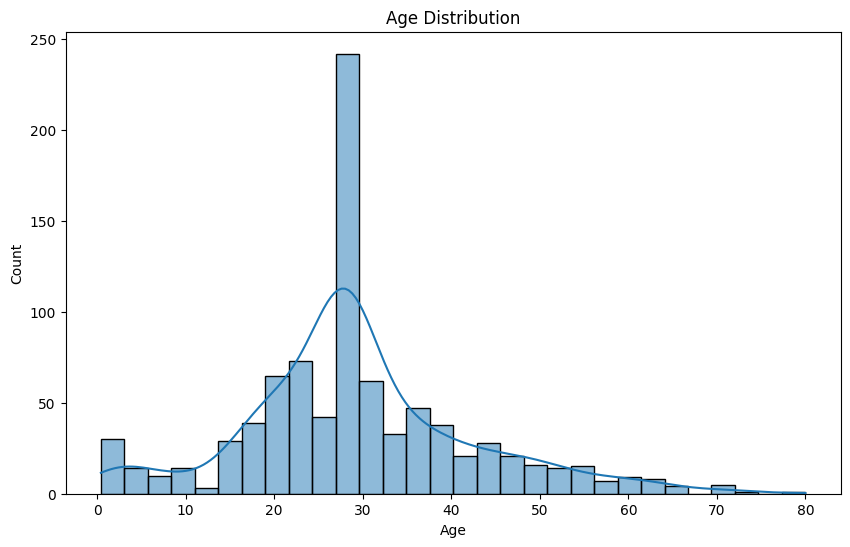

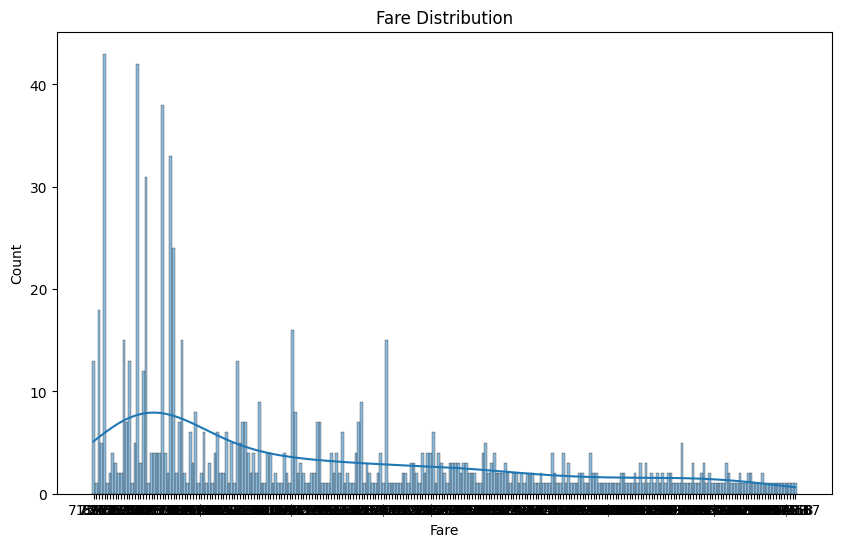

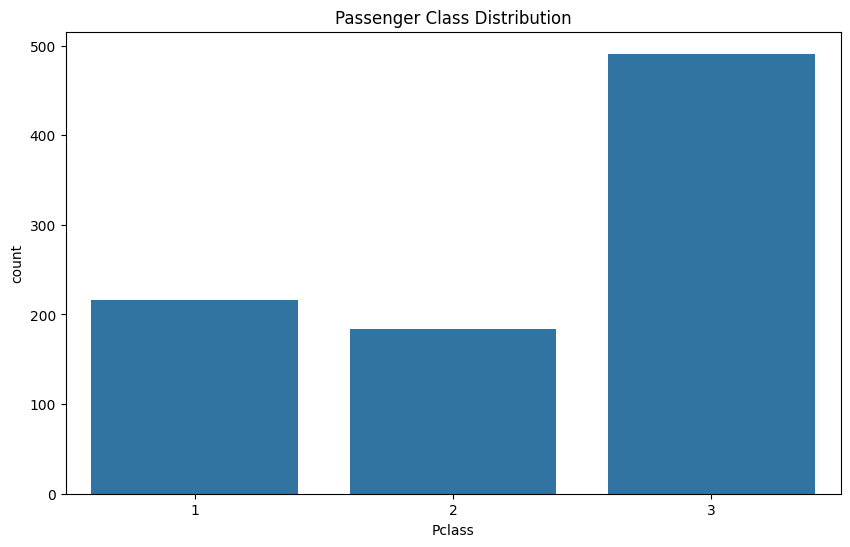

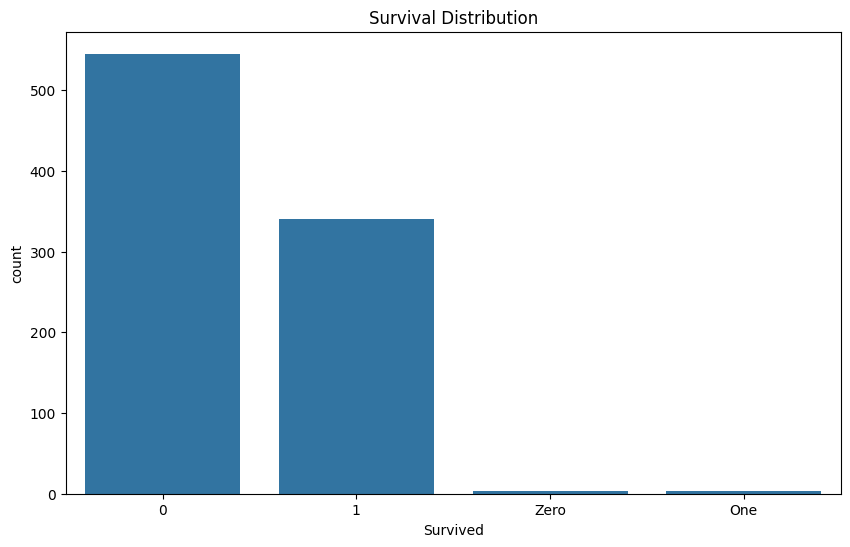

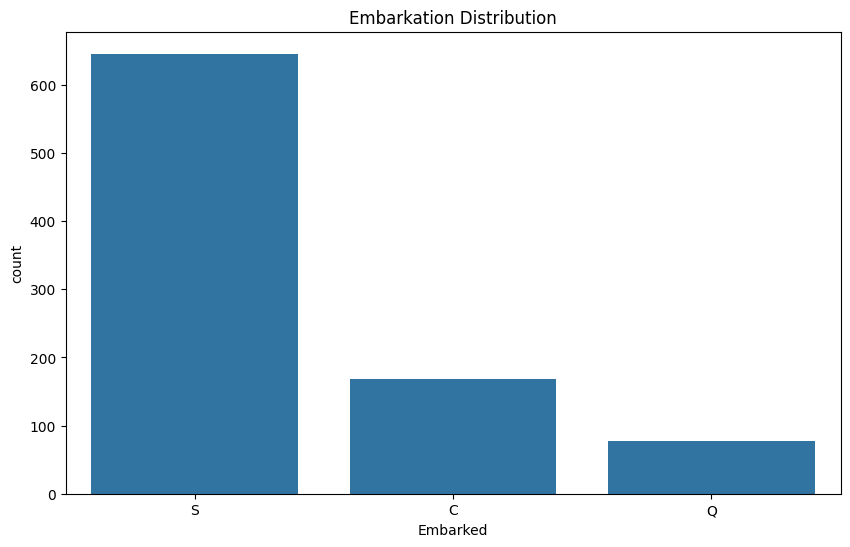

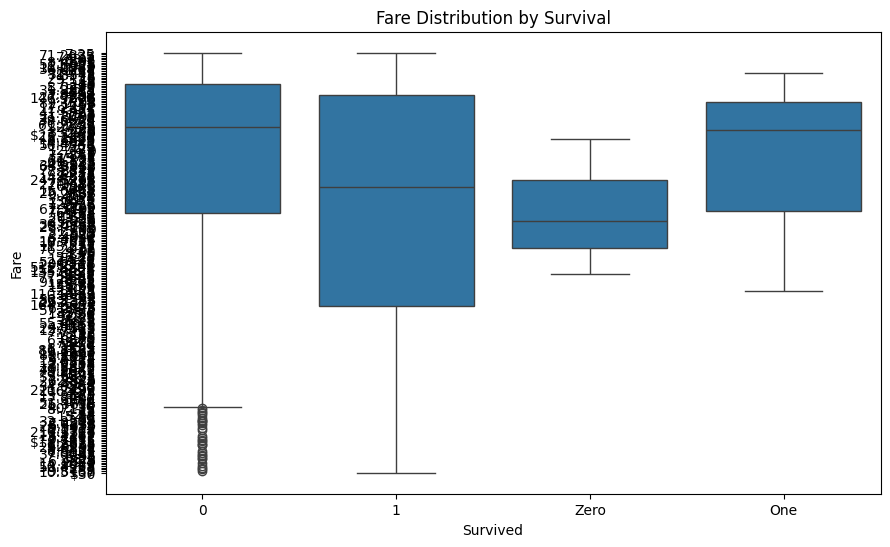

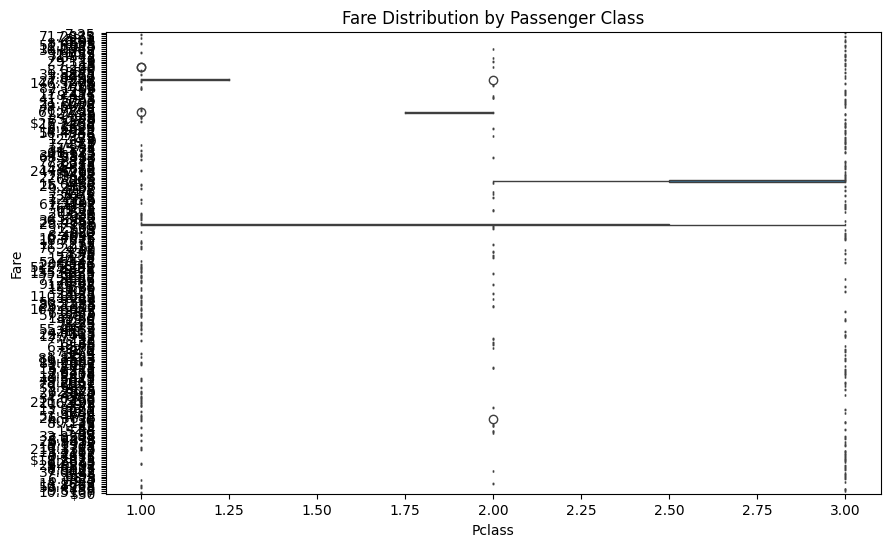

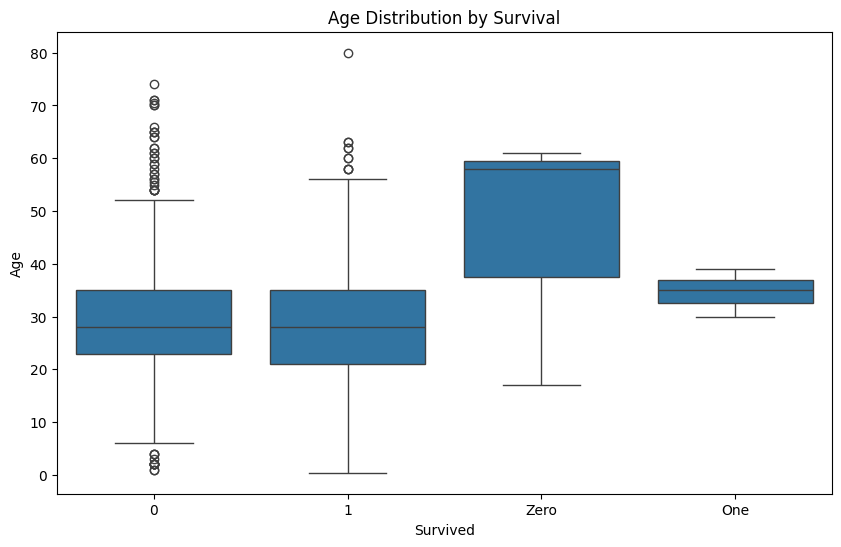

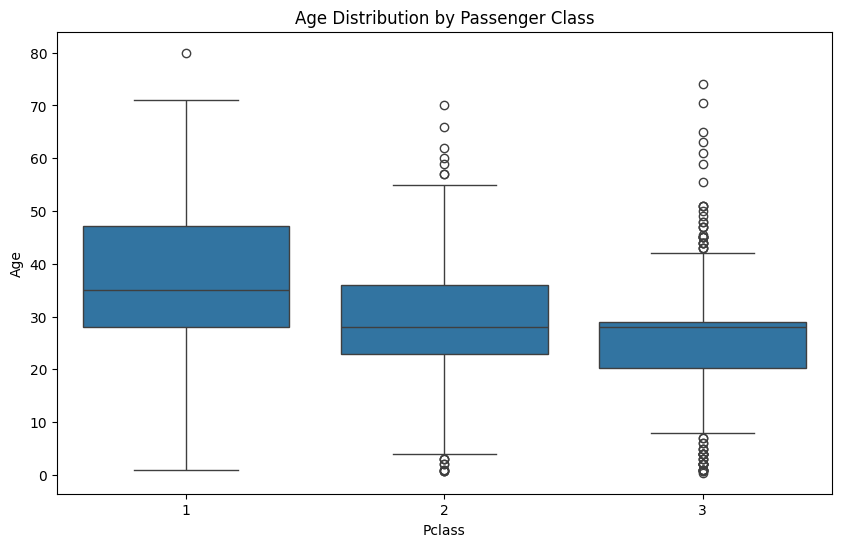

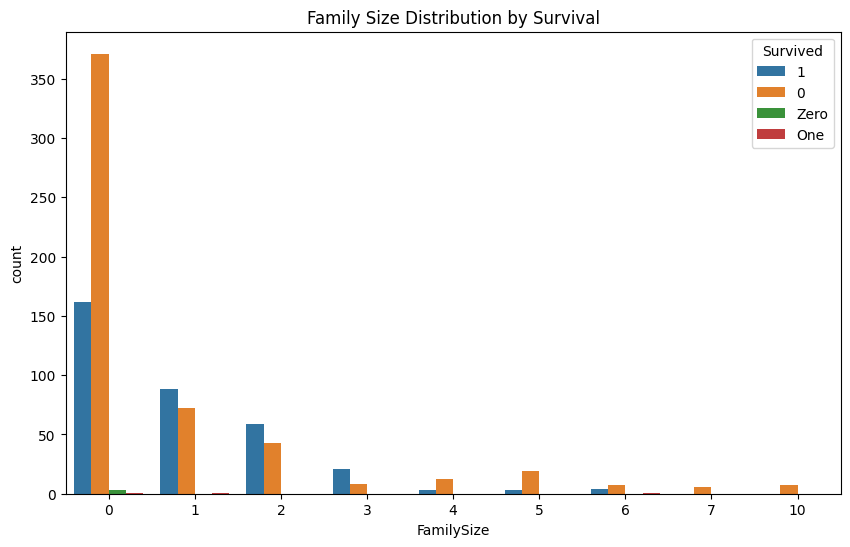

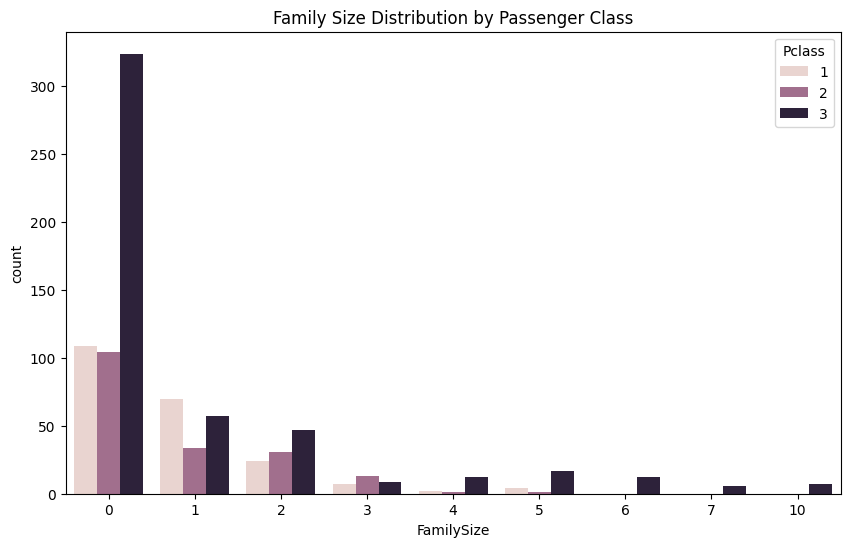

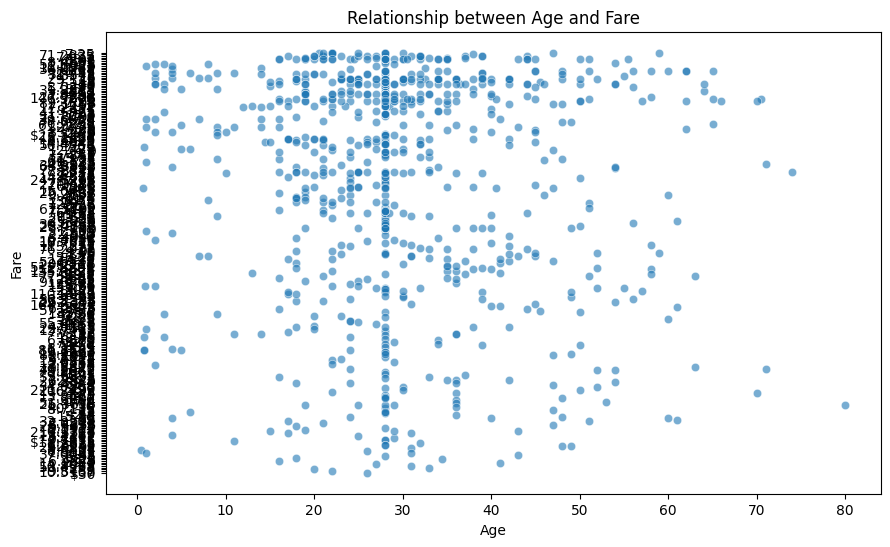

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' 

# 1. Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 2. Distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

# 3. Distribution of 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# 4. Distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# 5. Distribution of 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Embarkation Distribution')
plt.show()

# 6. Distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

# 7. Distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# 8. Distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# 9. Distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size Distribution by Survival')
plt.show()

# 11. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df)
plt.title('Family Size Distribution by Passenger Class')
plt.show()

# 12. Relationship between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
Correlation between Age and Fare: 0.10


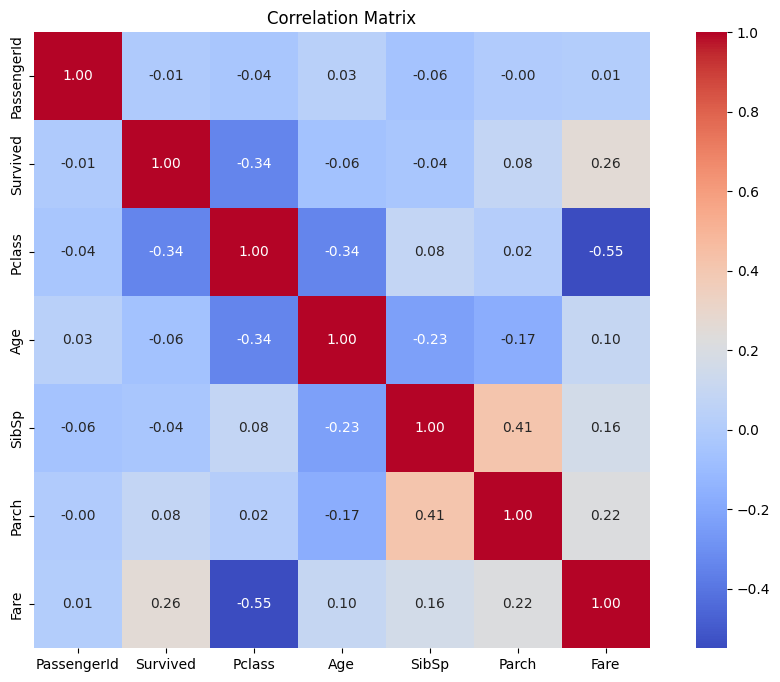

Possible correlations (absolute value > 0.3):
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId          1.0       NaN       NaN       NaN       NaN       NaN   
Survived             NaN  1.000000 -0.338481       NaN       NaN       NaN   
Pclass               NaN -0.338481  1.000000 -0.339898       NaN       NaN   
Age                  NaN       NaN -0.339898  1.000000       NaN       NaN   
SibSp                NaN       NaN       NaN       NaN  1.000000  0.414838   
Parch                NaN       NaN       NaN       NaN  0.414838  1.000000   
Fare                 NaN       NaN -0.549500       NaN       NaN       NaN   

               Fare  
PassengerId     NaN  
Survived        NaN  
Pclass      -0.5495  
Age             NaN  
SibSp           NaN  
Parch           NaN  
Fare         1.0000  


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Clean and convert 'Fare' to numeric
df['Fare'] = pd.to_numeric(df['Fare'].replace({'\$': '', ' ': ''}, regex=True), errors='coerce')

# Fill missing values for 'Age' and 'Fare'
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Generate correlation matrix
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate correlation between 'Age' and 'Fare'
age_fare_correlation = df['Age'].corr(df['Fare'])
print(f'Correlation between Age and Fare: {age_fare_correlation:.2f}')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Identify possible correlations with absolute value greater than 0.3
possible_correlations = correlation_matrix[correlation_matrix.abs() > 0.3]
print("Possible correlations (absolute value > 0.3):")
print(possible_correlations)